<a href="https://colab.research.google.com/github/thiago-carneiro/mestrado/blob/master/AstroInfo_Aula_CatalogLegacy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

### CBPF - Centro Brasileiro de Pesquisas Físicas

# Aula 3 - Professor: Clécio R De Bom


# Legacy: Catalog manipulation


This notebook will illustrate the basics of catalog manipulation, which contains the of data Legacy.

**Contact:** debom@cbpf.br</font>
/
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>

<font size="2">

Please do not remove this disclaimer.</font>

# Pre-requirements

Download the file catalog from page 

https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=0

In [29]:
!wget -O legacy_dr8_class.fits "https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1"
!ls

--2021-10-15 00:31:54--  https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits [following]
--2021-10-15 00:31:54--  https://www.dropbox.com/s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca998dff18e0dcfb9c7c4a0e7af.dl.dropboxusercontent.com/cd/0/get/BYCqvapQsqB2CyMMASbseCHV7Vci5Vsz-hGLyg7TlcvJrnIUhyjfMEPKqP2yMJON3zkX1PvpexmoK6zrA2scW7CjORW5ZVIHljS_TIDyZYG6ZFio-SHUXLBQq7kQBC2WGRFiXyj79p2rF4tkRlZfcsU1/file?dl=1# [following]
--2021-10-15 00:31:54--  https://uca998dff18e0dcfb9c7c4a0e7af.dl.dropboxusercontent.com/cd/0/get/BYCqvapQsqB2CyMMASbseCHV7Vci5Vsz-hGLyg7TlcvJrnIUhyjfMEPKqP2yM

## Import necessary packages

In [30]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn
import os


# Open catalog from fits table using astropy package

In [31]:
hdul = fits.open("legacy_dr8_class.fits", ignore_missing_end=True) 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 1
cat_table = Table(data)
cols=cat_table.columns
print(cat_table)
print(cols)

        ra                dec         ...        z_spec       training
------------------ ------------------ ... ------------------- --------
219.08289517954503  34.62503563674176 ...               -99.0      0.0
  219.018686653907  34.62537369835652 ...               -99.0      0.0
 218.9763831277981 34.626465741964694 ... 0.20600000023841858      1.0
218.92461988134852  34.62559613136096 ...               -99.0      0.0
219.10422528282172  34.62584794653823 ...               -99.0      0.0
 219.1401551191026  34.63060062779776 ...               -99.0      0.0
219.07940419061788   34.6265108832743 ...               -99.0      0.0
218.95238017111876  34.62802154931848 ...               -99.0      0.0
  219.106935147277  34.62930367862053 ...               -99.0      0.0
 218.8540579148524 34.629540769545564 ...               -99.0      0.0
               ...                ... ...                 ...      ...
221.40034030049185   35.0263478059078 ...               -99.0      0.0
221.21

# Constructing Pandas DataFrame from Table fits

In [32]:
df = cat_table.to_pandas()
print(df)

                ra        dec      MAG_R  ...      zmax  z_spec  training
0       219.082895  34.625036  22.280201  ...  0.863962 -99.000       0.0
1       219.018687  34.625374  20.950979  ...  0.397827 -99.000       0.0
2       218.976383  34.626466  18.890739  ...  0.230530   0.206       1.0
3       218.924620  34.625596  20.606371  ...  0.588631 -99.000       0.0
4       219.104225  34.625848  20.372391  ...  0.257679 -99.000       0.0
...            ...        ...        ...  ...       ...     ...       ...
203479  221.384627  35.031304  20.289848  ...  0.430521 -99.000       0.0
203480  221.267106  35.032654  22.278854  ...  0.598062 -99.000       0.0
203481  221.357931  35.031956  21.256090  ...  0.568702 -99.000       0.0
203482  221.140035  35.031835  20.928772  ...  0.596554 -99.000       0.0
203483  221.306115  35.032601  22.024387  ...  0.773673 -99.000       0.0

[203484 rows x 22 columns]


# Add column Pandas DataFrame

In [33]:
new_col = "_id" # name new column
df['ra'] = df['ra'].astype(str) # change numbers to string
df['dec'] = df['dec'].astype(str) # change numbers to string
df[new_col] = df['ra'] + df['dec'] # join two columns
print(df)

                        ra  ...                                   _id
0       219.08289517954503  ...   219.0828951795450334.62503563674176
1         219.018686653907  ...     219.01868665390734.62537369835652
2        218.9763831277981  ...   218.976383127798134.626465741964694
3       218.92461988134852  ...   218.9246198813485234.62559613136096
4       219.10422528282172  ...   219.1042252828217234.62584794653823
...                    ...  ...                                   ...
203479   221.3846269372925  ...    221.384626937292535.03130360684637
203480  221.26710586697644  ...   221.2671058669764435.03265425222566
203481  221.35793083937708  ...    221.3579308393770835.0319557953791
203482  221.14003466677406  ...  221.1400346667740635.031834870454304
203483  221.30611517880223  ...  221.3061151788022335.032600651235455

[203484 rows x 23 columns]


#Splitting in two Dataframe

In [34]:
print("Daframe 1")
df_1 = df.iloc[:,2:-7] # set mags columns dataframe 1 from dataframe
df_1[new_col] = df[new_col] # insert ID column
cols1 = df_1.columns.tolist()
cols1 = cols1[-1:] + cols1[:-1] # set first column _id
df_1 = df_1[cols1] # set first column _id
print(df_1)
print(df_1.columns.tolist())
print("********************************")
print("Daframe 2")
df_2 = df.iloc[:,-7:-2] # set photoz columns dataframe 1 from dataframe
df_2[new_col] = df[new_col] # insert ID column
cols2 = df_2.columns.tolist()
cols2 = cols2[-1:] + cols2[:-1] # set first column _id
df_2 = df_2[cols2] # set first column _id
print(df_2)
print(df_2.columns.tolist())

Daframe 1
                                         _id      MAG_R  ...  MAGErr_W3  MAGErr_W4
0        219.0828951795450334.62503563674176  22.280201  ...   0.114776  -0.075900
1          219.01868665390734.62537369835652  20.950979  ...   0.706567  -0.799649
2        218.976383127798134.626465741964694  18.890739  ...  -9.551555  -0.682852
3        218.9246198813485234.62559613136096  20.606371  ...   4.317370  -0.843075
4        219.1042252828217234.62584794653823  20.372391  ...   1.281699   1.788509
...                                      ...        ...  ...        ...        ...
203479    221.384626937292535.03130360684637  20.289848  ...  18.655874  -0.504265
203480   221.2671058669764435.03265425222566  22.278854  ...  -0.115952   0.318850
203481    221.3579308393770835.0319557953791  21.256090  ...   0.324572   0.561515
203482  221.1400346667740635.031834870454304  20.928772  ...  -1.286056  -0.460461
203483  221.3061151788022335.032600651235455  22.024387  ...  -0.767880  -0.5

# Mounting your google drive

To mount your google drive:
click in showed link and set your account google get token 

In [35]:
from google.colab import drive
drive.mount('/content/drive')
DriveSave = '/content/drive/MyDrive' # define folder save in Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Saving New Catalogs with Pandas Dataframe in csv 


(Google Drive)

In [36]:
df_1.to_csv(os.path.join(DriveSave,'LegacyCatalog1.csv'), index=False)
df_2.to_csv(os.path.join(DriveSave,'LegacyCatalog2.csv'), index=False)


# Loading New Catalogs with Pandas Dataframe in csv 

In [37]:
df_1 = pd.read_csv(os.path.join(DriveSave,'LegacyCatalog1.csv')) 
df_2 = pd.read_csv(os.path.join(DriveSave,'LegacyCatalog2.csv')) 

# Using the _id column as a reference finally we can now performance the join operation

In [38]:
DF_mag = df_1.set_index(new_col)
DF = df_2.join(DF_mag, on=new_col)
print(DF)
print(DF.columns.tolist())

                                         _id         z  ...  MAGErr_W3  MAGErr_W4
0        219.0828951795450334.62503563674176  0.778901  ...   0.114776  -0.075900
1          219.01868665390734.62537369835652  0.335511  ...   0.706567  -0.799649
2        218.976383127798134.626465741964694  0.219682  ...  -9.551555  -0.682852
3        218.9246198813485234.62559613136096  0.542923  ...   4.317370  -0.843075
4        219.1042252828217234.62584794653823  0.227206  ...   1.281699   1.788509
...                                      ...       ...  ...        ...        ...
203479    221.384626937292535.03130360684637  0.399513  ...  18.655874  -0.504265
203480   221.2671058669764435.03265425222566  0.525794  ...  -0.115952   0.318850
203481    221.3579308393770835.0319557953791  0.497148  ...   0.324572   0.561515
203482  221.1400346667740635.031834870454304  0.561410  ...  -1.286056  -0.460461
203483  221.3061151788022335.032600651235455  0.670019  ...  -0.767880  -0.541523

[203622 rows x 

# Now save and load new dataframe in table fits

In [39]:
t2 = Table.from_pandas(DF)
fits_table_filename = os.path.join(DriveSave,'NewLegacyCatalog.fits')
hdu = fits.BinTableHDU(data=t2)
hdu.writeto(fits_table_filename, overwrite=True)

hdul = fits.open(fits_table_filename, ignore_missing_end=True) 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 1
cat_table = Table(data)
cols=cat_table.columns
print(cat_table)
print(cols)

                _id                           z          ...      MAGErr_W4     
------------------------------------ ------------------- ... -------------------
 219.0828951795450334.62503563674176   0.778901219367981 ... -0.0759001150727272
   219.01868665390734.62537369835652 0.33551111817359924 ... -0.7996485233306885
 218.976383127798134.626465741964694 0.21968227624893188 ... -0.6828519701957703
 218.9246198813485234.62559613136096   0.542923092842102 ... -0.8430752158164978
 219.1042252828217234.62584794653823   0.227205827832222 ...  1.7885087728500366
  219.140155119102634.63060062779776  0.4622515141963959 ... -0.8408935666084291
  219.0794041906178834.6265108832743  0.7665448784828186 ... -2.6986157894134517
 218.9523801711187634.62802154931848  0.6852128505706787 ...   9.755480766296387
   219.10693514727734.62930367862053  0.4312166571617127 ...  0.9499387741088868
 218.854057914852434.629540769545564 0.26132190227508545 ...  -0.916178584098816
                            

# Set Dataframe condition (mag R < 20)

In [40]:
DFMAGR20 = DF[DF['MAG_R'] < 20]
print(DFMAGR20)

                                         _id         z  ...  MAGErr_W3  MAGErr_W4
2        218.976383127798134.626465741964694  0.219682  ...  -9.551555  -0.682852
14        219.119427344439634.63266943455789  0.181169  ...   0.065676   0.428052
27      219.1050832410185834.637306709538635  0.195434  ...   0.251950   2.410352
28       219.1116303379641334.63846217402524  0.195882  ...  -4.193285  -0.575248
30        218.893899457402334.63850522158348  0.383395  ...   0.304107   2.751483
...                                      ...       ...  ...        ...        ...
203438    221.260260333561435.01373075174152  0.400500  ...   0.255466   0.456562
203440    221.402609501773135.01676962316078  0.150196  ...   0.245604   0.292380
203441    221.403223664121935.01955191933627  0.131958  ...   0.234937   1.065051
203450    221.407621549922235.01804876804364  0.508276  ...   0.501685  -0.575829
203457   221.3141799824552235.02015887305804  0.202796  ...  -1.734960   2.927527

[32009 rows x 2

# Fit mag R and mag R < 20 using dataframe plot histogram

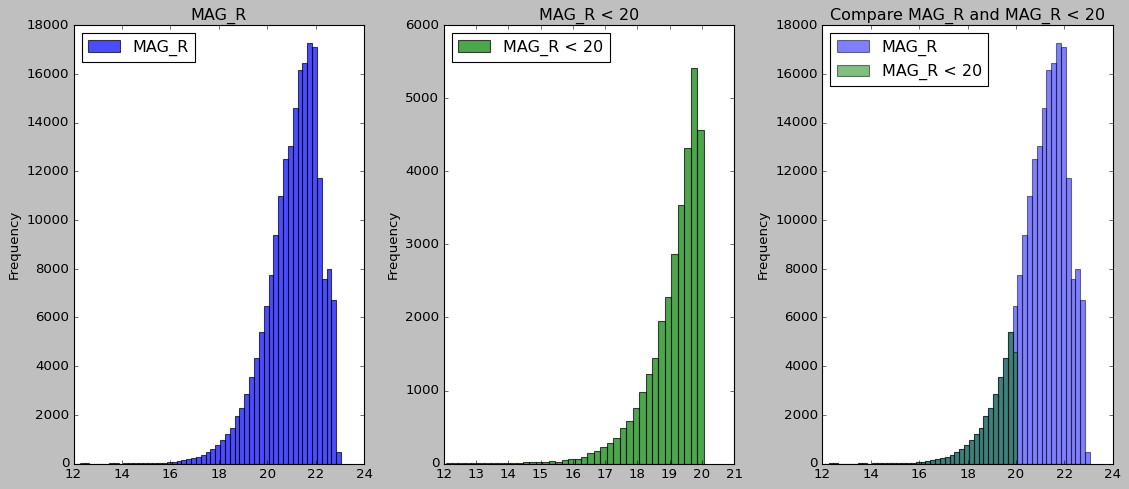

In [41]:

hor = 3
ver = 1

plt.style.use('classic')

fig = plt.figure(figsize=(14, 6), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.1, right=0.5, wspace=0.1)


binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)


ax = fig.add_subplot(gs[0, 0])
bins0 = binarange(DF["MAG_R"], binsize)
ax = DF["MAG_R"].plot.hist(bins=bins0, color='blue', alpha=0.7, label="MAG_R")
ax.set_title("MAG_R")
plt.legend(loc='upper left')

ax = fig.add_subplot(gs[0, 1])
bins1 = binarange(DFMAGR20["MAG_R"], binsize)
ax = DFMAGR20["MAG_R"].plot.hist(bins=bins1, color='green', alpha=0.7, label="MAG_R < 20")
ax.set_title("MAG_R < 20")
plt.legend(loc='upper left')

ax = fig.add_subplot(gs[0, 2])
ax = DF["MAG_R"].plot.hist(bins=bins0, color='blue', alpha=0.5, label="MAG_R")
ax = DFMAGR20["MAG_R"].plot.hist(bins=bins0, color='green', alpha=0.5, label="MAG_R < 20") # equal bins all mag r
ax.set_title("Compare MAG_R and MAG_R < 20")
plt.legend(loc='upper left')

plt.show
plt.savefig(os.path.join(DriveSave,'PlotsHist_MAGR_Legacy.png'))

# Saving and Load mag R in file format numpy python (.npy)

In [42]:
np.save(os.path.join(DriveSave,'Array_MAGR.npy'), np.array(DFMAGR20["MAG_R"]))
MAG_R = np.load(os.path.join(DriveSave,'Array_MAGR.npy'))

# Fitting with Seaborn mag R < 20 


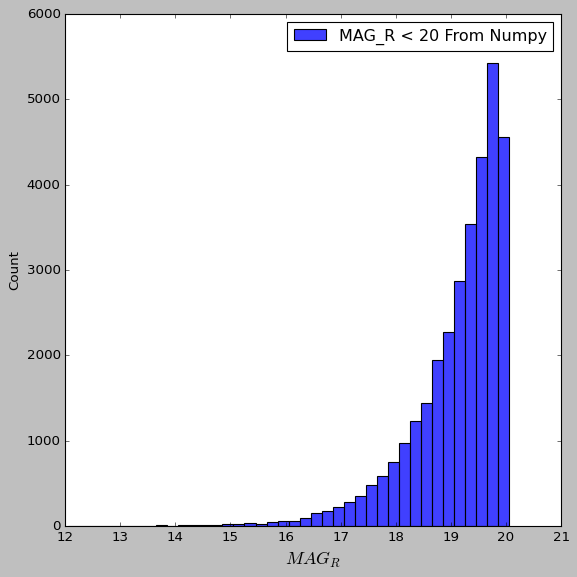

In [43]:

fig = plt.figure(figsize=(8,8))
ax = seaborn.histplot(x=MAG_R, bins=bins1, label="MAG_R < 20 From Numpy")
ax.set_xlabel('$MAG_{R}$', fontsize=16)
ax.legend(loc="best")
plt.savefig(os.path.join(DriveSave,'Hist_MAGR20_Legacy.png'))

In [44]:
print("######## List files in local google colab:")
!ls 
print("******** List files in your google drive:")
!ls drive/MyDrive/ 


######## List files in local google colab:
drive  legacy_dr8_class.fits  sample_data
******** List files in your google drive:
 Array_MAGR.npy
'CBPF MQA Lista 1.gdoc'
 Classroom
'Colab Notebooks'
 Escritos
 Hist_MAGR20_Legacy.png
 LegacyCatalog1.csv
 LegacyCatalog2.csv
 LegacyCatalog.csv
 Mestrado2010
 Mestrado2021
'MQA 2021.1 - Apresentação 1 - Postulado de Planck.gslides'
 NewLegacyCatalog.fits
'Notas do Google Play Livros'
 papers
 Pessoal
 PlotsHist_MAGR_Legacy.png
 PlotZ_Legacy.png
'PROCESSAR - Avulsos'
'PROCESSAR - DropBox'
 RPG
 SINPEP
 stock
 TabSessionManager
"Treantmonk's Guide to 5e Wizards.gdoc"
"Treantmonk's Guide to Wizards 5e.gdoc"
 Udacity


# Analisando o erro médio

In [45]:
selecao=(pd.cut(DF['MAG_R'],20)==pd.Interval(21.788, 22.329, closed='right'))
DF[selecao].MAGErr_R.median()

0.062048010528087616

In [46]:
binned = pd.cut(DF['MAG_G'],50)

erro_medio=list()
erro_min=list()
erro_max=list()
ponto_medio=list()

for bin in (binned.unique()):
  ponto_medio.append(DF[binned==bin].MAG_G.mean())
  erro_medio.append(DF[binned==bin].MAGErr_G.mean())
  erro_min.append(DF[binned==bin].MAGErr_G.min())
  erro_max.append(DF[binned==bin].MAGErr_G.max())

df=pd.DataFrame({'ErroMédio':erro_medio,'ErroMínimo':erro_min,'ErroMáximo':erro_max},ponto_medio).rename_axis('Magnitude').sort_index()

In [47]:
df

,ErroMédio,ErroMínimo,ErroMáximo
Magnitude,,,
12.774199,0.000208,0.000208,0.000208
13.244905,0.000324,0.000257,0.000414
13.443728,0.000358,0.000293,0.000466
13.814343,0.000502,0.000502,0.000502
14.021317,0.000582,0.000331,0.000813
14.414227,0.001852,0.000512,0.003192
14.613489,0.000492,0.000305,0.000592
14.891538,0.000725,0.000459,0.001088
15.154048,0.000838,0.000624,0.001274


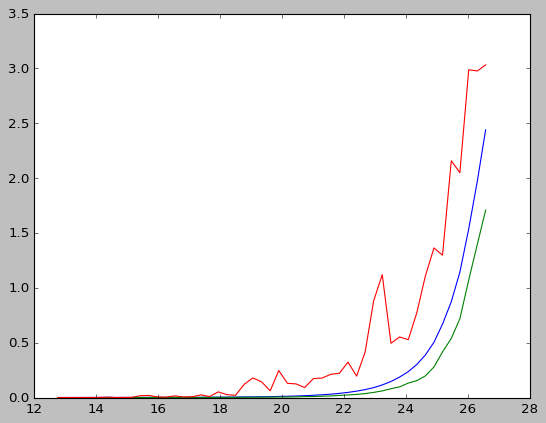

In [48]:
plt.plot(df)

<ErrorbarContainer object of 3 artists>

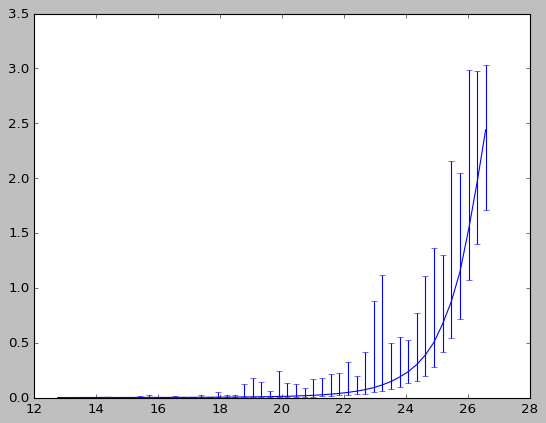

In [49]:
plt.errorbar(df.index,df.ErroMédio,[-df.ErroMínimo+df.ErroMédio,df.ErroMáximo-df.ErroMédio],fmt='-')

In [56]:
cores = ['R','G','Z','W1','W2','W3','W4']
df=dict()

for cor in cores:
  mag_cor='MAG_'+cor
  erro_cor='MAGErr_'+cor

  binned = pd.cut(DF[mag_cor],50)

  erro_medio=list()
  erro_min=list()
  erro_max=list()
  ponto_medio=list()

  #print(binned.unique())
  intervals=binned.unique()

  for bin in intervals:
    #print(bin)    
    ponto_medio.append(DF[binned==bin][mag_cor].mean())
    erro_medio.append(DF[binned==bin][erro_cor].mean())
    erro_min.append(DF[binned==bin][erro_cor].min())
    erro_max.append(DF[binned==bin][erro_cor].max())

  df[cor]=pd.DataFrame({'ErroMédio':erro_medio,'ErroMínimo':erro_min,'ErroMáximo':erro_max},ponto_medio).rename_axis('Magnitude').sort_index()

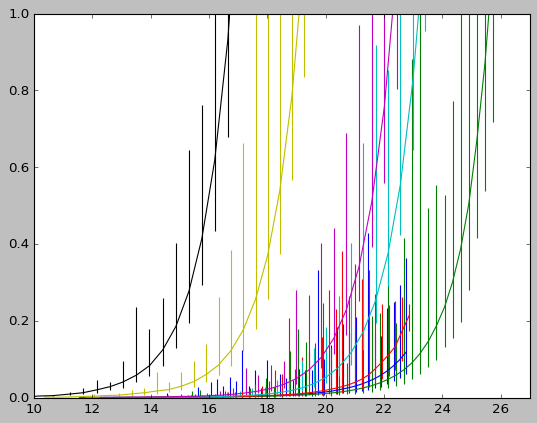

In [59]:
plt.ylim(0,1)
plt.xlim(10,27)
for cor in cores:
  plt.errorbar(df[cor].index,df[cor].ErroMédio,[-df[cor].ErroMínimo+df[cor].ErroMédio,df[cor].ErroMáximo-df[cor].ErroMédio],fmt='-',capsize=0)

<function matplotlib.pyplot.show>

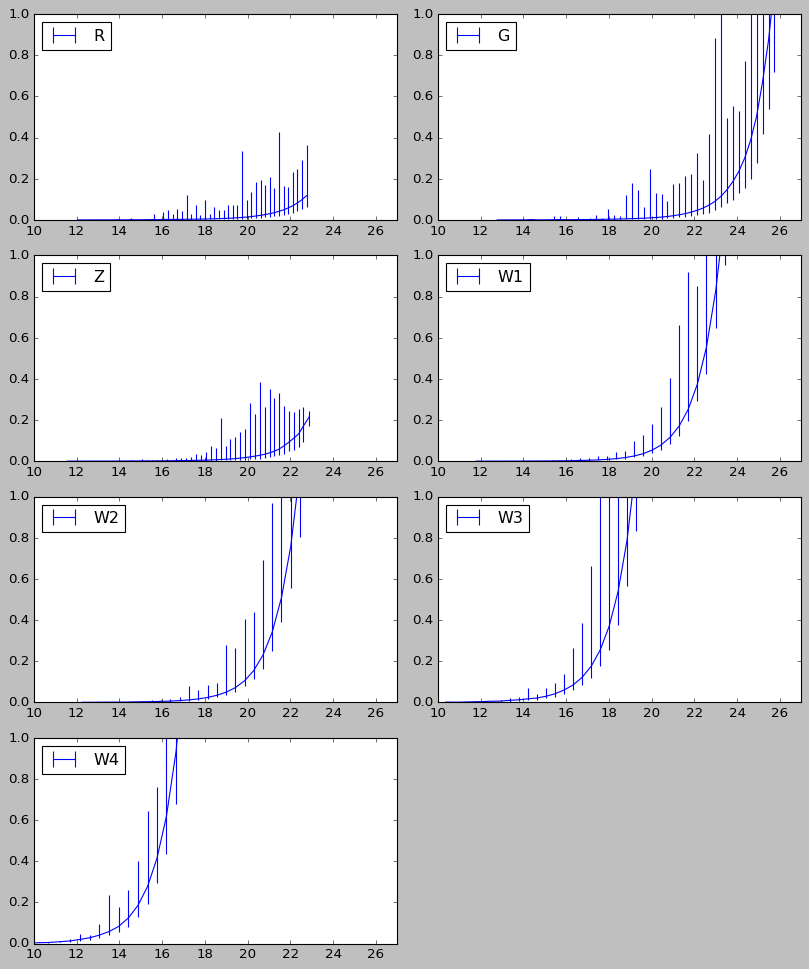

In [58]:
hor = 2
ver = int(len(cores)/2)+1

plt.style.use('classic')

fig = plt.figure(figsize=(10, 3*ver), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.1, right=0.5, wspace=0.1)


binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)


i=0
for v in range(ver):
  for h in range(hor):
    if i >= len(cores):
      break

    cor=cores[i]
    mag_cor='MAG_'+cor
    erro_cor='MAGErr_'+cor


    fig.add_subplot(gs[v, h])

    plt.ylim(0,1)
    plt.xlim(10,27)

    ax = plt.errorbar(df[cor].index,df[cor].ErroMédio,[-df[cor].ErroMínimo+df[cor].ErroMédio,df[cor].ErroMáximo-df[cor].ErroMédio],fmt='-',capsize=0) #capsize
    ax.set_label(cor)
    plt.legend(loc='upper left')

    #plt.axvline(mag_corte[cor])

    i+=1

plt.show

Agora, separando os bins quando o erro médio > 0.2:

<function matplotlib.pyplot.show>

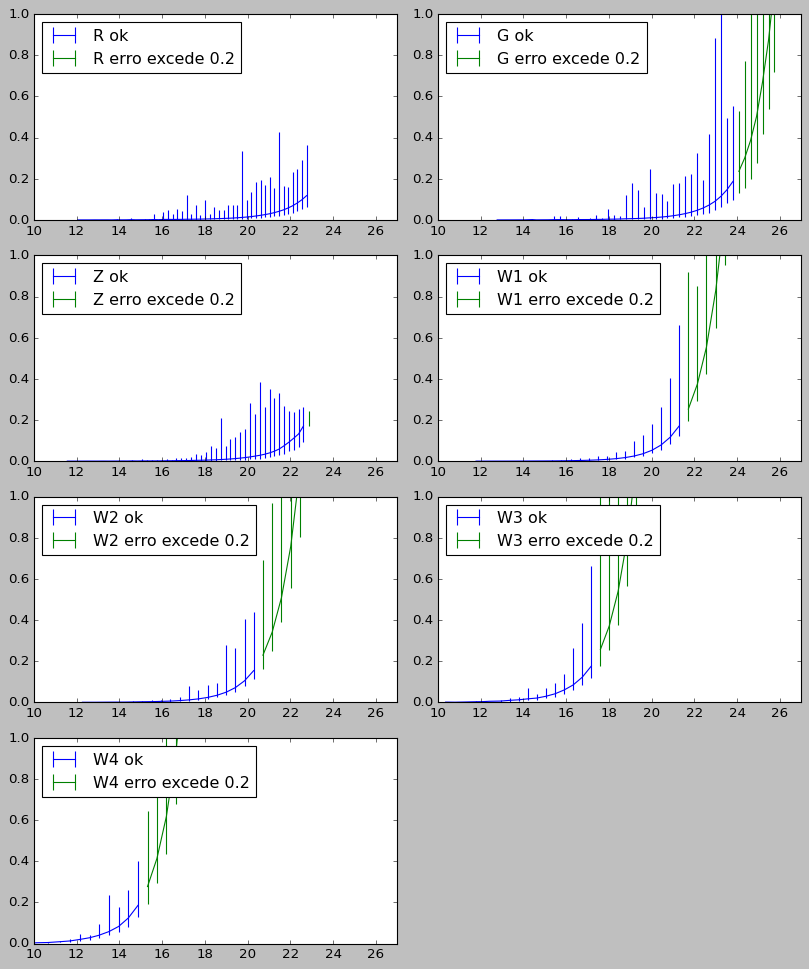

In [63]:
hor = 2
ver = int(len(cores)/2)+1

plt.style.use('classic')

fig = plt.figure(figsize=(10, 3*ver), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.1, right=0.5, wspace=0.1)


binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize)


i=0
for v in range(ver):
  for h in range(hor):
    if i >= len(cores):
      break

    cor=cores[i]
    mag_cor='MAG_'+cor
    erro_cor='MAGErr_'+cor


    fig.add_subplot(gs[v, h])

    plt.ylim(0,1)
    plt.xlim(10,27)

    tmp=df[cor]
    cor_ok=tmp[tmp.ErroMédio<=0.2]
    cor_not_ok=tmp[tmp.ErroMédio>0.2]

    ax1 = plt.errorbar(cor_ok.index,cor_ok.ErroMédio,[-cor_ok.ErroMínimo+cor_ok.ErroMédio,cor_ok.ErroMáximo-cor_ok.ErroMédio],fmt='-',capsize=0) #capsize
    ax1.set_label(cor+' ok')
    ax2 = plt.errorbar(cor_not_ok.index,cor_not_ok.ErroMédio,[-cor_not_ok.ErroMínimo+cor_not_ok.ErroMédio,cor_not_ok.ErroMáximo-cor_not_ok.ErroMédio],fmt='-',capsize=0) #capsize
    ax2.set_label(cor+' erro excede 0.2')
    plt.legend(loc='upper left')

    #plt.axvline(mag_corte[cor])

    i+=1

plt.show

# Uma outra abordagem: boxplot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fbb46487a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb45284290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb4528b2d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb45284d50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbb3e6497d0>,
  <matplotlib.lines.Line2D at 0x7fbb4620cb50>]}

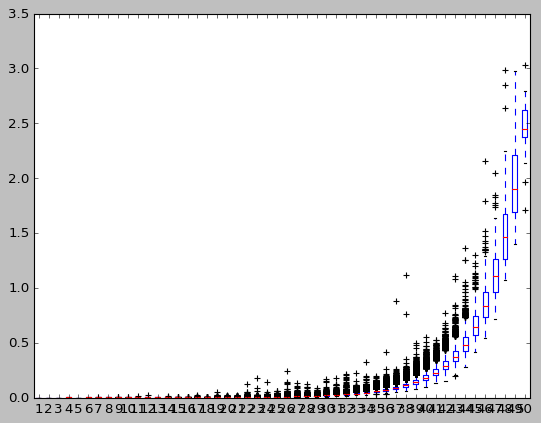

In [53]:
import numpy as np
binned = pd.cut(DF['MAG_G'],50)

series=dict()

for bin in (binned.unique()):
  idx=DF[binned==bin].MAGErr_G.mean()
  serie=list(DF[binned==bin].MAGErr_G)
  series[idx]=serie

ordenada=list()

for idx in sorted(series.keys()):
  ordenada.append(series[idx])

plt.boxplot(ordenada)

#dfG=pd.DataFrame(series)
#colunas=list(series.columns)
#dfG.boxplot()
#colunas
#series

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

<function matplotlib.pyplot.show>

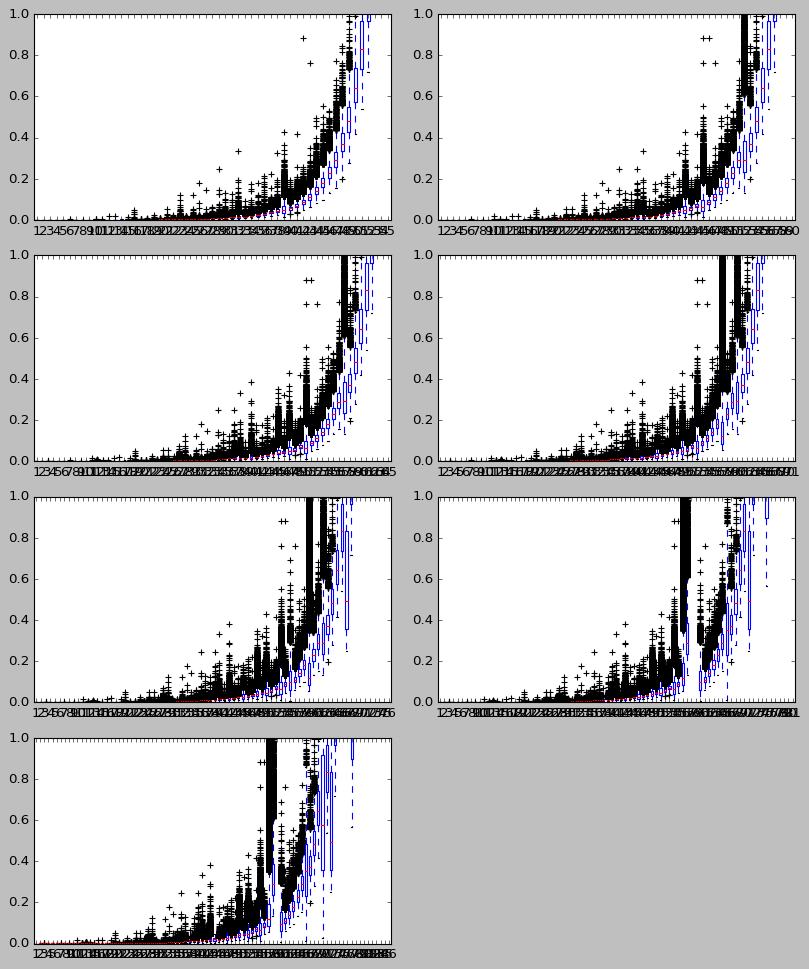

In [54]:
# import numpy as np
# binned = pd.cut(DF['MAG_G'],50)

# series=dict()

# for bin in (binned.unique()):
#   idx=DF[binned==bin].MAGErr_G.mean()
#   serie=list(DF[binned==bin].MAGErr_G)
#   series[idx]=serie

# ordenada=list()

# for idx in sorted(series.keys()):
#   ordenada.append(series[idx])

# plt.boxplot(ordenada)


cores = ['R','G','Z','W1','W2','W3','W4']
df=dict()

ordenada=dict()

for cor in cores:
  mag_cor='MAG_'+cor
  erro_cor='MAGErr_'+cor

  binned = pd.cut(DF[mag_cor],5)

  intervals=binned.unique()

  for bin in intervals:
    idx=DF[binned==bin][erro_cor].mean()
    serie=DF[binned==bin][erro_cor]
    series[idx]=serie
  
  ordenada[cor]=list()
  
  for idx in sorted(series.keys()):
    ordenada[cor].append(series[idx])



hor = 2
ver = int(len(cores)/2)+1

plt.style.use('classic')

fig = plt.figure(figsize=(10, 3*ver), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.1, right=0.5, wspace=0.1)

i=0
for v in range(ver):
  for h in range(hor):
    if i >= len(cores):
      break

    cor=cores[i]

    fig.add_subplot(gs[v, h])

    plt.ylim(0,1)
    #plt.xlim(10,27)

    ax = plt.boxplot(ordenada[cor])

#    ax.set_label(cor)
#    plt.legend(loc='upper left')

    #plt.axvline(mag_corte[cor])

    i+=1

plt.show